<a href="https://colab.research.google.com/github/SEBIN6/Exploratory-Data-Analysis-EDA-/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [23]:
sns.set(style="whitegrid")

In [24]:
df = pd.read_csv('train.csv')

Display dataset info

In [25]:
print("Dataset Info:")
print(df.info())
print("\n" + "="*50 + "\n")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None




Display summary statistics

In [26]:
print("Summary Statistics:")
print(df.describe())
print("\n" + "="*50 + "\n")

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  




Display value counts for categorical columns

In [27]:
print("Value Counts for 'Sex':")
print(df['Sex'].value_counts())
print("\nValue Counts for 'Embarked':")
print(df['Embarked'].value_counts())
print("\nValue Counts for 'Pclass':")
print(df['Pclass'].value_counts())
print("\n" + "="*50 + "\n")

Value Counts for 'Sex':
Sex
male      577
female    314
Name: count, dtype: int64

Value Counts for 'Embarked':
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Value Counts for 'Pclass':
Pclass
3    491
1    216
2    184
Name: count, dtype: int64




**Pairplot for selected numerical columns, colored by Survived**

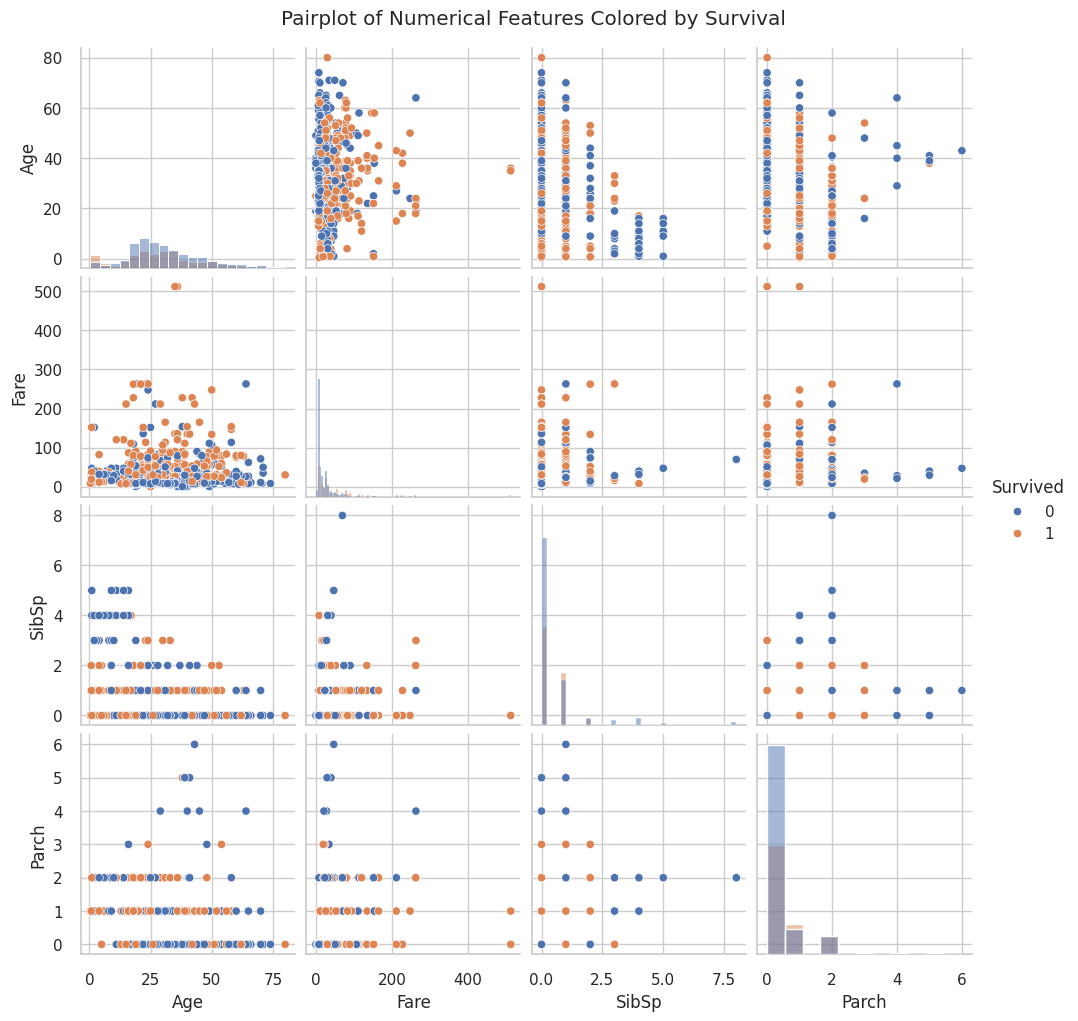

Observation: The pairplot shows pairwise relationships between Age, Fare, SibSp, Parch, and Survived. Higher fares seem associated with survival, and younger passengers may have higher survival rates. Diagonal histograms show distributions, with Fare being highly skewed.




In [28]:
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived', diag_kind='hist')
plt.suptitle("Pairplot of Numerical Features Colored by Survival", y=1.02)
plt.show()
print("Observation: The pairplot shows pairwise relationships between Age, Fare, SibSp, Parch, and Survived. Higher fares seem associated with survival, and younger passengers may have higher survival rates. Diagonal histograms show distributions, with Fare being highly skewed.")
print("\n" + "="*50 + "\n")

**Correlation heatmap for numerical columns**

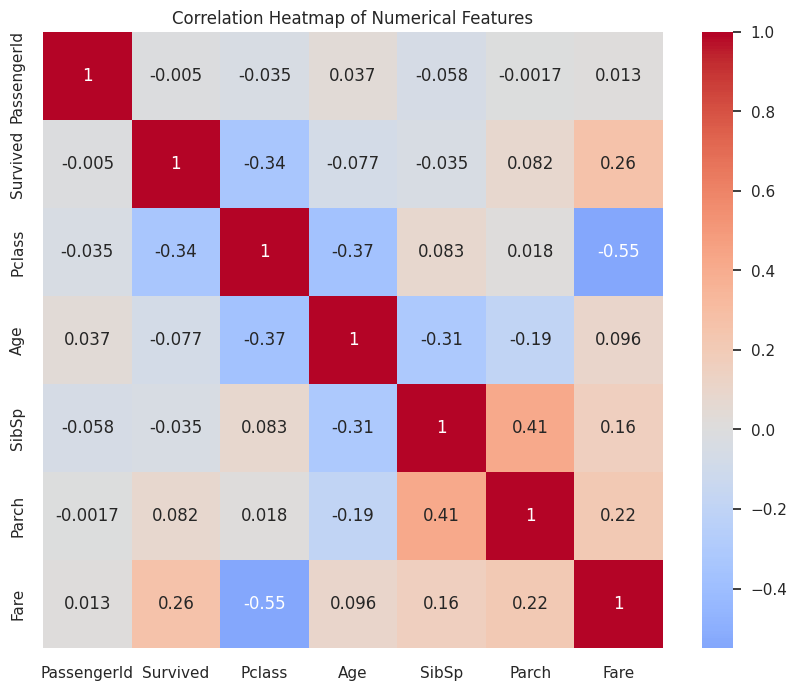

Observation: The heatmap shows a strong negative correlation between Pclass and Fare (-0.55), indicating first-class tickets were more expensive. Fare has a moderate positive correlation with Survived (0.26), suggesting higher fares linked to better survival chances. Age has a weak negative correlation with Survived (-0.08).




In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
print("Observation: The heatmap shows a strong negative correlation between Pclass and Fare (-0.55), indicating first-class tickets were more expensive. Fare has a moderate positive correlation with Survived (0.26), suggesting higher fares linked to better survival chances. Age has a weak negative correlation with Survived (-0.08).")
print("\n" + "="*50 + "\n")

Histogram for Age

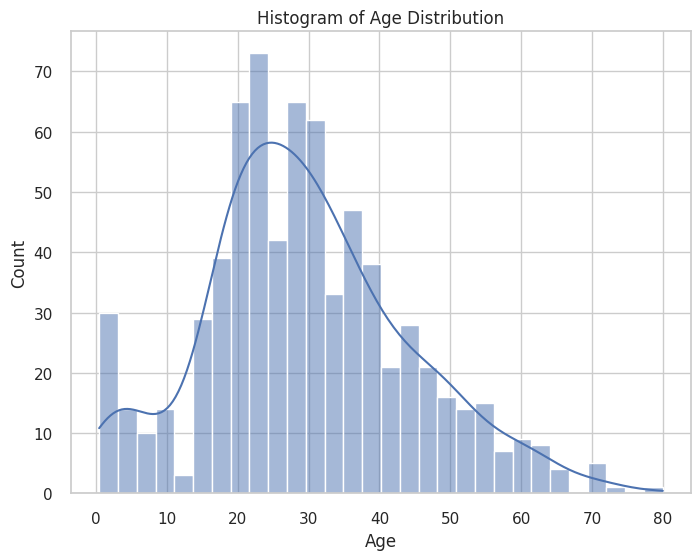

Observation: The Age distribution is slightly right-skewed, with a mean around 29.7 and a range from 0.42 to 80. Most passengers are between 20-40 years old, with some very young and elderly outliers.




In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Histogram of Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
print("Observation: The Age distribution is slightly right-skewed, with a mean around 29.7 and a range from 0.42 to 80. Most passengers are between 20-40 years old, with some very young and elderly outliers.")
print("\n" + "="*50 + "\n")

Histogram for Fare

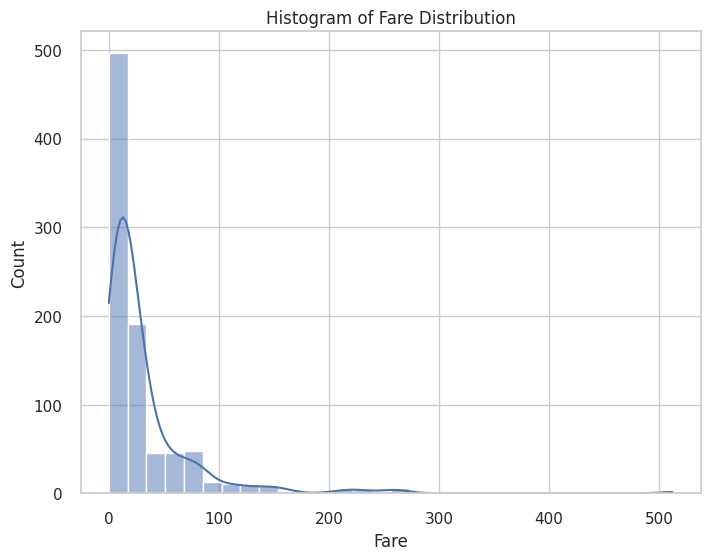

Observation: The Fare distribution is highly right-skewed, with a mean of 32.20 and a maximum of 512.33. Most passengers paid lower fares, with a few paying significantly higher, likely first-class passengers.




In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title("Histogram of Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()
print("Observation: The Fare distribution is highly right-skewed, with a mean of 32.20 and a maximum of 512.33. Most passengers paid lower fares, with a few paying significantly higher, likely first-class passengers.")
print("\n" + "="*50 + "\n")

Boxplot of Age by Survived

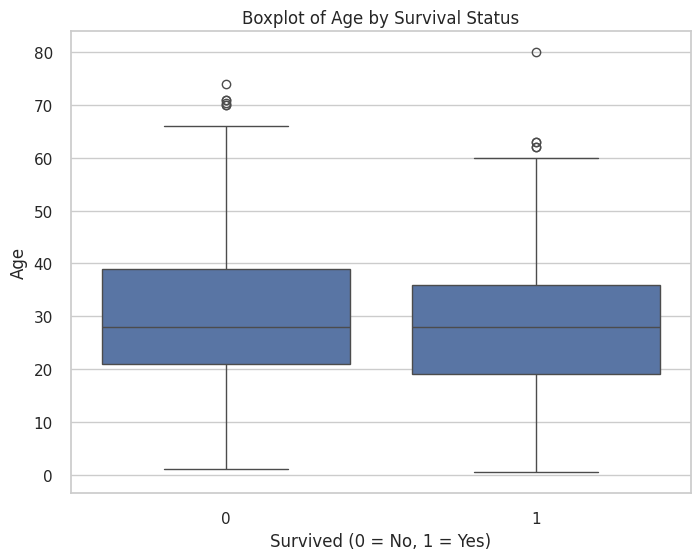

Observation: Survivors have a slightly lower median age than non-survivors, suggesting younger passengers may have had better survival chances, possibly due to prioritization of women and children.




In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Boxplot of Age by Survival Status")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()
print("Observation: Survivors have a slightly lower median age than non-survivors, suggesting younger passengers may have had better survival chances, possibly due to prioritization of women and children.")
print("\n" + "="*50 + "\n")

Boxplot of Fare by Pclass

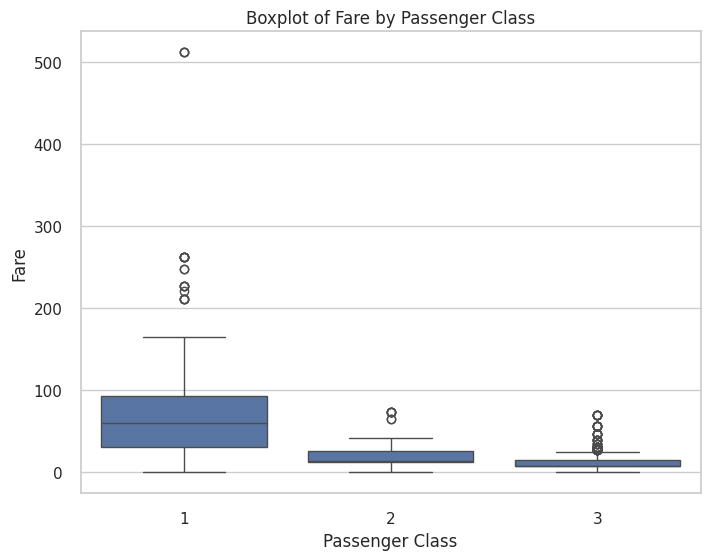

Observation: First-class passengers (Pclass=1) paid significantly higher fares with greater variability, while third-class fares are lower and less variable, aligning with the negative correlation between Pclass and Fare.




In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Boxplot of Fare by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()
print("Observation: First-class passengers (Pclass=1) paid significantly higher fares with greater variability, while third-class fares are lower and less variable, aligning with the negative correlation between Pclass and Fare.")
print("\n" + "="*50 + "\n")

Scatterplot of Age vs Fare, colored by Survived

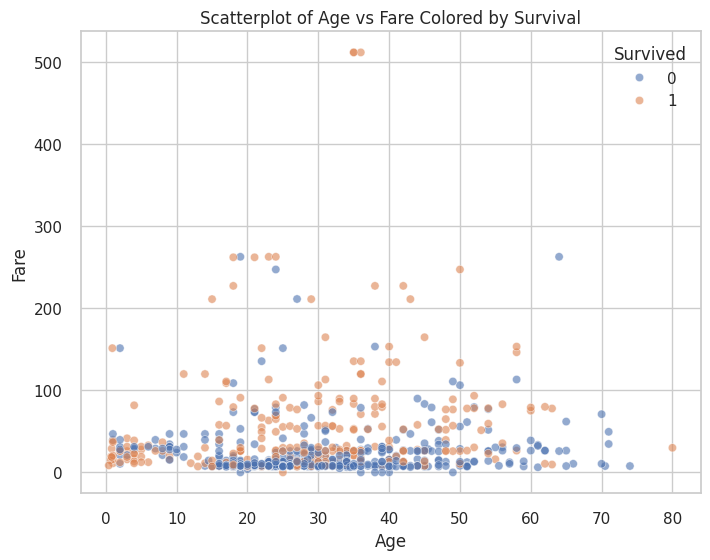

Observation: Higher fare passengers, regardless of age, tend to have higher survival rates, likely due to their first-class status. No clear age-based pattern emerges, but higher fares are associated with survival.




In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.6)
plt.title("Scatterplot of Age vs Fare Colored by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()
print("Observation: Higher fare passengers, regardless of age, tend to have higher survival rates, likely due to their first-class status. No clear age-based pattern emerges, but higher fares are associated with survival.")
print("\n" + "="*50 + "\n")

Bar plot for survival rate by Pclass

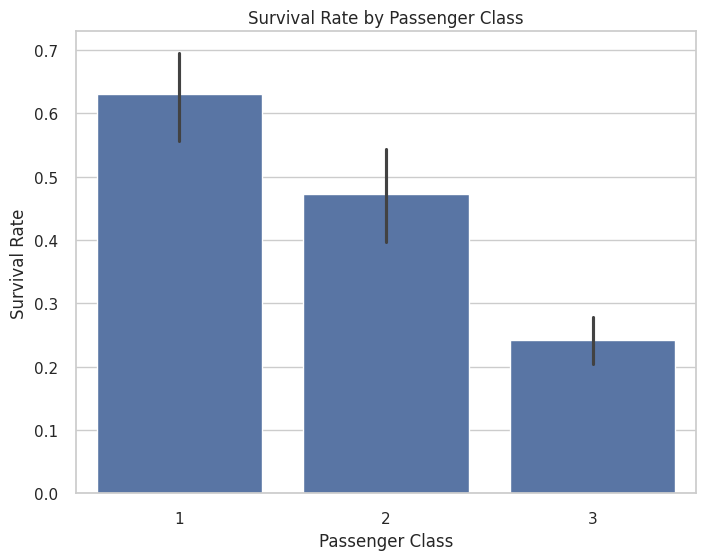

Observation: First-class passengers have the highest survival rate (~63%), followed by second-class (~47%), and third-class (~24%), consistent with better access to lifeboats for higher classes.




In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()
print("Observation: First-class passengers have the highest survival rate (~63%), followed by second-class (~47%), and third-class (~24%), consistent with better access to lifeboats for higher classes.")
print("\n" + "="*50 + "\n")

Bar plot for survival rate by Sex

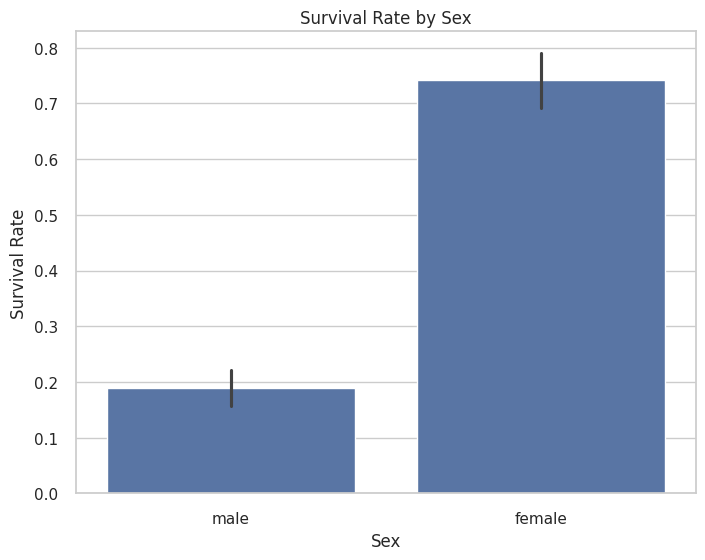

Observation: Females have a significantly higher survival rate (~74%) compared to males (~19%), reflecting the 'women and children first' policy during evacuation.




In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()
print("Observation: Females have a significantly higher survival rate (~74%) compared to males (~19%), reflecting the 'women and children first' policy during evacuation.")
print("\n" + "="*50 + "\n")

Bar plot for survival rate by Embarked

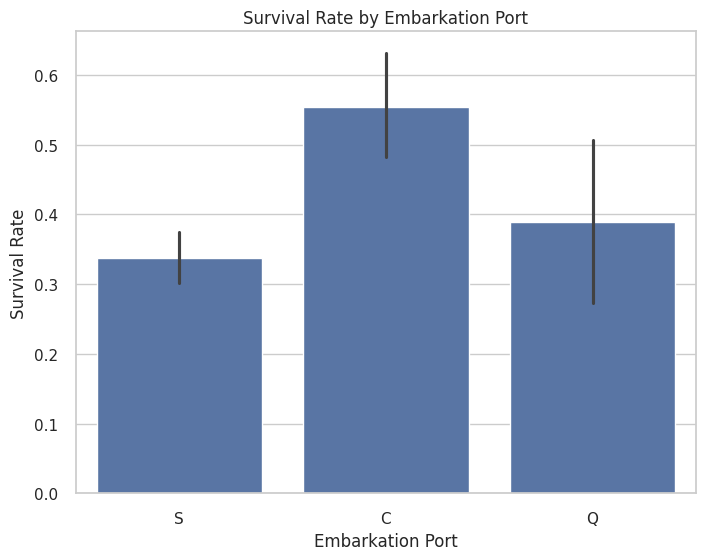

Observation: Passengers embarking from Cherbourg (C) have the highest survival rate (~55%), followed by Queenstown (Q, ~39%) and Southampton (S, ~34%). This may relate to a higher proportion of first-class passengers from Cherbourg.




In [37]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Survival Rate")
plt.show()
print("Observation: Passengers embarking from Cherbourg (C) have the highest survival rate (~55%), followed by Queenstown (Q, ~39%) and Southampton (S, ~34%). This may relate to a higher proportion of first-class passengers from Cherbourg.")
print("\n" + "="*50 + "\n")

Summary

In [38]:
print("Summary of Findings:")
print("- Demographics: The dataset includes 891 passengers, with 577 males and 314 females. Most are third-class (491), followed by first-class (216) and second-class (184).")
print("- Missing Data: Age has 177 missing values, Cabin has 687, and Embarked has 2, requiring careful handling in further analysis.")
print("- Survival Rates: Overall survival rate is 38.4%. By class: first (63%), second (47%), third (24%). By sex: females (74%), males (19%). By embarkation: Cherbourg (55%), Queenstown (39%), Southampton (34%).")
print("- Key Influences: Passenger class, sex, and age significantly influence survival. Higher-class passengers, females, and younger passengers are more likely to survive, likely due to lifeboat access and prioritization policies.")
print("- Distributions: Age is slightly right-skewed (mean 29.7, median 28), Fare is highly right-skewed (mean 32.20, max 512.33), indicating economic disparity.")
print("- Correlations: Strong negative correlation between Pclass and Fare (-0.55), moderate positive correlation between Fare and Survived (0.26).")
print("This EDA highlights the impact of socioeconomic status and gender on survival, providing a foundation for predictive modeling.")
print("\n" + "="*50 + "\n")

Summary of Findings:
- Demographics: The dataset includes 891 passengers, with 577 males and 314 females. Most are third-class (491), followed by first-class (216) and second-class (184).
- Missing Data: Age has 177 missing values, Cabin has 687, and Embarked has 2, requiring careful handling in further analysis.
- Survival Rates: Overall survival rate is 38.4%. By class: first (63%), second (47%), third (24%). By sex: females (74%), males (19%). By embarkation: Cherbourg (55%), Queenstown (39%), Southampton (34%).
- Key Influences: Passenger class, sex, and age significantly influence survival. Higher-class passengers, females, and younger passengers are more likely to survive, likely due to lifeboat access and prioritization policies.
- Distributions: Age is slightly right-skewed (mean 29.7, median 28), Fare is highly right-skewed (mean 32.20, max 512.33), indicating economic disparity.
- Correlations: Strong negative correlation between Pclass and Fare (-0.55), moderate positive cor